# Simple Linear Reg.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("height-weight.csv")
df.head(3)

,Weight,Height
0,45,120
1,58,135
2,48,123


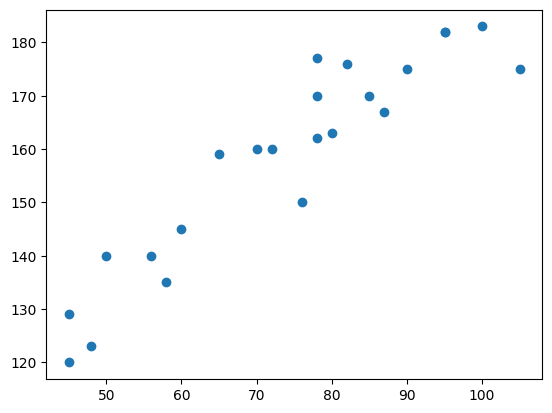

In [3]:
plt.scatter(data=df,x="Weight",y="Height")

# **STEPS :**

### 1. Diving to Independent and Dependent Features

In [4]:
X=df[["Weight"]]
y=df["Height"]

### 2. Train-Test Split

In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=0.20,
                                               random_state=42)

### 3. Standardization

In [6]:
# Train Independent Feature would be standarized

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [7]:
X_train.head()

,Weight
12,105
1,58
13,100
5,78
2,48


In [8]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

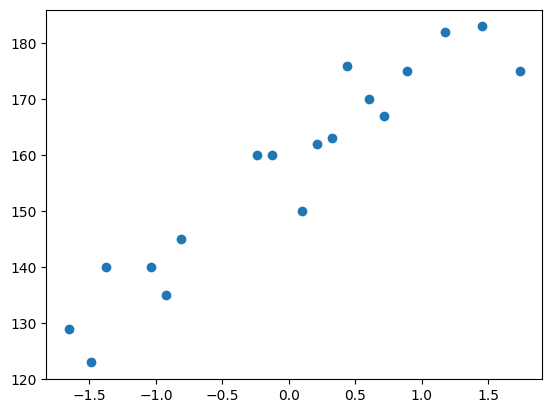

In [9]:
plt.scatter(X_train,y_train)

### 4. Train The Model

In [10]:
from sklearn.linear_model import LinearRegression

regression=LinearRegression()

In [11]:
regression.fit(X_train,y_train)

LinearRegression()

In [12]:
regression.coef_ ## Slope of Weight

array([17.03440872])

In [13]:
regression.intercept_

np.float64(157.5)

In [22]:
X_train

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281],
       [ 1.17153765],
       [-1.6552288 ],
       [-0.80719886],
       [-0.24184557],
       [ 0.0973664 ],
       [-1.37255215],
       [-1.03334018],
       [-0.12877492],
       [ 0.88886101],
       [ 0.43657837],
       [ 0.60618436],
       [ 0.71925502],
       [ 0.32350772]])

In [24]:
regression.predict(X_train)

array([187.0869102 , 141.82375282, 182.27168069, 161.08467086,
       132.19329381, 177.45645118, 129.3041561 , 143.74984463,
       153.38030364, 159.15857905, 134.11938561, 139.89766102,
       155.30639545, 172.64122168, 164.93685446, 167.82599217,
       169.75208397, 163.01076266])

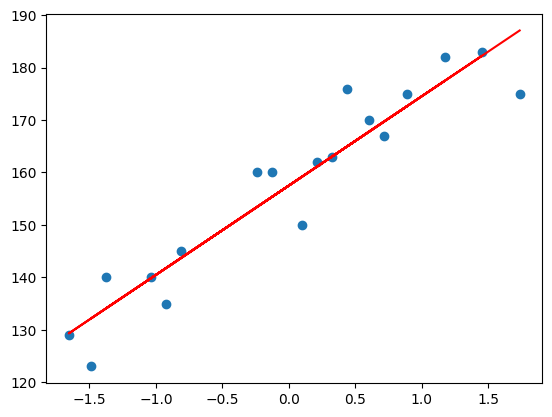

In [17]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train),color="r")

### 5. Predict

### prediction of test data
predicted height output= intercept +coef_(Weights)

y_pred_test =156.470 + 17.29(X_test)

In [18]:
## Prediction for test data
y_pred=regression.predict(X_test)

In [19]:
y_pred,y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

In [25]:
X_test

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

In [26]:
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

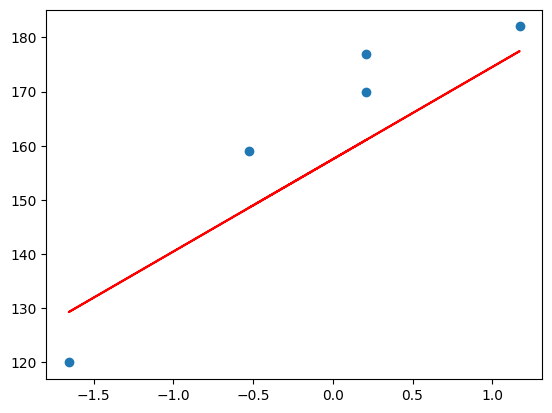

In [20]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regression.predict(X_test),color="r")

### 6. Performance Metrics

In [27]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


In [28]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.776986986042344

**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model n: The number of observations k: The number of predictor variables

In [29]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252

Let's say new data point weight is 80, now i want to predict the height

In [30]:
scaled_weight=scaler.transform([[80]])
scaled_weight

C:\Users\SPPL IT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [31]:
regression.predict(scaled_weight) ## New Height !

array([163.01076266])

## Assumptions

plot a scatter plot for the predictions

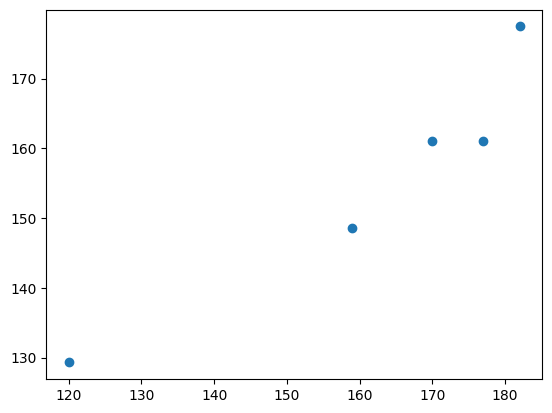

In [32]:
plt.scatter(y_test,y_pred)

If Linearly Distributed , good prediction

### Residuals

residuals= y_test-y_pred

In [33]:
residuals= y_test-y_pred
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

Plot the residuals

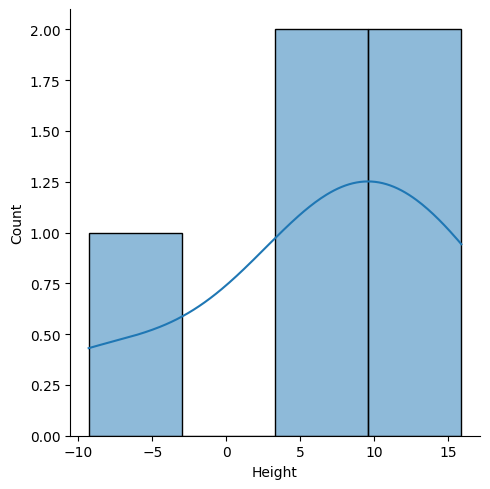

In [35]:
sns.displot(residuals,kde=True)